<a href="https://colab.research.google.com/github/Somu112/Predictive-Analysis/blob/master/Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scenario 3: Medical Cost Prediction**

You are provided with the medical cost dataset. You need to predict individual medical costs billed by
health insurance.

Dataset Description:
The dataset contains 7 features:

* age: age of primary beneficiary
* sex: gender of primary beneficiary female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively
high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of
height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smokes or not
* region: the beneficiary's residential area in the US, northeast, southeast, southwest,
northwest
* charges: Individual medical costs billed by health insurance

Tasks to be performed:
1. Load the data, check its shape and check for null values - Beginner
2. Convert categorical feature to numerical values - Intermediate
3. Split the dataset for training and testing - Beginner
4. Train the model using sklearn - Beginner
5. Find the intercept and coefficient from trained model - Beginner
6. Predict the prices of test data and evaluate the model - Beginner

Topics Covered:
* Training a Linear Regression model
* Predicting using the trained model
* Evaluating a model: R2-score and Root Mean Squared Error
* Finding out coefficients and intercept

In [1]:
!wget https://www.dropbox.com/s/6ghwbs2o1r15zu4/insurance.csv

--2021-04-29 20:40:18--  https://www.dropbox.com/s/6ghwbs2o1r15zu4/insurance.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6ghwbs2o1r15zu4/insurance.csv [following]
--2021-04-29 20:40:18--  https://www.dropbox.com/s/raw/6ghwbs2o1r15zu4/insurance.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc599c9c724ebfe54bb22130b6df.dl.dropboxusercontent.com/cd/0/inline/BNiqg5vb_2nrXihYi7-A5488mFlhEGwMbRgmkvTRfhUmpdLxuLhAU0B3GCqP9CT-wb5r6CfqNY6M-ohgfx84C8_roZbDQOwdpnrF0exPCX94AQbnnp-R9icAa_N5_MbzYhnOofjbpkFCF8AUyARBOvxU/file# [following]
--2021-04-29 20:40:18--  https://uc599c9c724ebfe54bb22130b6df.dl.dropboxusercontent.com/cd/0/inline/BNiqg5vb_2nrXihYi7-A5488mFlhEGwMbRgmkvTRfhUmpdLxuLhAU0B3GCqP9CT-wb5r6CfqNY6M-ohgfx84C8_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*Question-2: We can not use categorical features for prediction so convert
categorical features to numeric values using One Hot Encoding*

In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
d=df.select_dtypes(include=[object])
encoded_labels=ohe.fit_transform(d).toarray()

In [6]:
df_encoded=pd.DataFrame(encoded_labels)
df.drop(columns=['sex','smoker','region'],inplace=True)
df3 = pd.concat([df_encoded,df],ignore_index=True,axis=1)

In [7]:
df3

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,27.900,0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,33.770,1,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,33.000,3,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,22.705,0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50,30.970,3,10600.54830
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18,31.920,0,2205.98080
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18,36.850,0,1629.83350
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21,25.800,0,2007.94500


*Question-3: Split the dependent and independent features. Split the dataset
into training and testing features keeping 25% of the data for testing*

In [8]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=7)
print(X_train.shape)
print(X_test.shape)

(1003, 11)
(335, 11)


*Question-4: Apply linear regression to train a model for prediction*

In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*Question-5: Find the coefficients and intercept from the trained model*

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print("The final coefficient after training is:",lr.coef_)
print("The final intercept after training is: ",lr.intercept_)

The final coefficient after training is: [    97.18113355    -97.18113355 -11905.32547313  11905.32547314
    667.24158209     15.86338029   -233.63531263   -449.46964974
    251.90247991    353.38540435    465.2280675 ]
The final intercept after training is:  -887.6917181754106


*Question-6: Predict the prices from the test data and calculate r2 score and
root mean squared error*

In [12]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = regr.predict(X_test)
print("Prediction foe test data:", y_pred[:5])
print("r2 score of our model is: ", r2_score(y_test,y_pred))
print("root mean squared error of our model is:",mean_squared_error(y_test,y_pred,squared=False))

Prediction foe test data: [15248.874306   11126.97945225 -2048.68105088 29282.63519248
  9070.8295246 ]
r2 score of our model is:  0.7509741262661105
root mean squared error of our model is: 6080.97796761699


**Scenario 4: Startup's Profit Prediction**

You are provided with the '50_Startups' data. Using the given features, you have to predict the profit of
these startups

Dataset Description:

The dataset contains 5 features:
* R&D Spend: Expenditures in Research and Development
* Administration: Expenditures in Administration
* Marketing Spend: Expenditures in Marketing
* State: In which state the company belongs to
* Profit: The profit made by the company

Tasks to be performed:
1. Load the data, check its shape and check for null values - Beginner
2. Convert categorical feature to numerical values - Intermediate
3. Split the dataset for training and testing - Beginner
4. Perform K-Fold cross validation - Intermediate (Bridging Question)
5. Train the model using sklearn, also find the intercept and coefficient from trained
model - Beginner
6. Predict the profits of test data and evaluate the model - Beginner
7. Plot the predicted profit and actual profit from the test data with respect to R&D
spend - Beginner

Topics Covered:
* Training a Linear Regression model
* Predicting using the trained model
* Evaluating a model: R2-score and Root Mean Squared Error
* Finding out coefficients and intercept
* Plotting the prediction

In [13]:
!wget https://www.dropbox.com/s/zcebxexe0a4atiy/50_Startups.csv

--2021-04-29 20:40:19--  https://www.dropbox.com/s/zcebxexe0a4atiy/50_Startups.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zcebxexe0a4atiy/50_Startups.csv [following]
--2021-04-29 20:40:20--  https://www.dropbox.com/s/raw/zcebxexe0a4atiy/50_Startups.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00406d128548d4ca42c1f8c70d.dl.dropboxusercontent.com/cd/0/inline/BNj0csbxs9QNtZXatZ_A5TSPBSiru4M9ixegEKdStbMggd61FwmyiNdNY3v-_aKEeteaK3Q-ZjE1Sj5Cu6W4GrifyTqVAMH6bCaGfiL43ogOV_jpnvQQ8P2ck-LBwaKo_osiPeF2RDjRhJzG95cwsY5S/file# [following]
--2021-04-29 20:40:20--  https://uc00406d128548d4ca42c1f8c70d.dl.dropboxusercontent.com/cd/0/inline/BNj0csbxs9QNtZXatZ_A5TSPBSiru4M9ixegEKdStbMggd61FwmyiNdNY3v-_aKEeteaK3Q-ZjE1Sj5Cu

In [14]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
df.shape

(50, 5)

In [16]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

*Question-2: We can not use string objects for prediction so convert the
categorical features to numerical values using Label Encoder*

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['State']=le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 4)
(10, 4)
(40,)
(10,)


*7. Print the list of root mean squared error at each iteration.*

In [19]:
from sklearn.model_selection import cross_val_score,KFold
model = LinearRegression()
kfold = KFold(n_splits=4,random_state=7)
score = cross_val_score(model,X,y,cv=kfold,scoring='neg_root_mean_squared_error')
print(score)

[ -9418.18983049  -9806.72408463  -6551.24951944 -14632.38196009]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [20]:
print("The final coefficient after training is:",lr.coef_)
print("The final intercept after training is: ",lr.intercept_)

The final coefficient after training is: [    97.18113355    -97.18113355 -11905.32547313  11905.32547314
    667.24158209     15.86338029   -233.63531263   -449.46964974
    251.90247991    353.38540435    465.2280675 ]
The final intercept after training is:  -887.6917181754106


In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = lr.predict(X_test)
print("r2 score of our model is:", r2_score(y_test,y_pred))
print("mean absolute error of our model is:", mean_squared_error(y_test,y_pred,squared=False))

r2 score of our model is: 0.9649827631091706
mean absolute error of our model is: 8913.354557987737


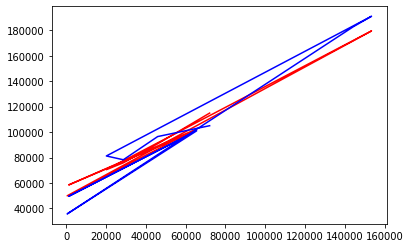

In [23]:
import matplotlib.pyplot as plt
plt.plot(X_test['R&D Spend'],y_pred,'r')
plt.plot(X_test['R&D Spend'],y_test,'b')
plt.show()

**Scenario 3: EduFun Nursery**

Industry: Educational

EduFun nursery is one of the top nurseries in philadelphia. Every year thousands of parents apply for their
child's admission here. Due to excessive number of applications there was objective to reject these
applicatios with proper response too. So the board decided to classify the applications based on occupation
of parents and child's nursery, family structure and financial standing, and social and health picture of the
family.

Tasks to be Performed:
* Import the required libraries
* Prepare the data (Data Proprocessing)
* Check for missing value
* Explore the data using EDA
* Training a logistic regression model
* Evaluating the model

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score
%matplotlib inline

*Step 2: Preparing the Data*

In [25]:
!wget https://www.dropbox.com/s/k2s14n5dp0phcyg/nursery.csv

--2021-04-29 20:40:24--  https://www.dropbox.com/s/k2s14n5dp0phcyg/nursery.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k2s14n5dp0phcyg/nursery.csv [following]
--2021-04-29 20:40:24--  https://www.dropbox.com/s/raw/k2s14n5dp0phcyg/nursery.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf06c975036f8e612ecd9d80fef.dl.dropboxusercontent.com/cd/0/inline/BNhBHEczl7NUSUDYK8_sGOMsh2HWzKpTD4UfedQQhAAnnfKVN3dRwHCBDvaUIGbSWC6spSngxZKxngfVzaDFEri8VLe6L8-1R2G_Fa5TIbwE3LLvv5mx5hO-fgjwsvuaYj0kicqm9NpdihheOmnpH8OM/file# [following]
--2021-04-29 20:40:24--  https://ucf06c975036f8e612ecd9d80fef.dl.dropboxusercontent.com/cd/0/inline/BNhBHEczl7NUSUDYK8_sGOMsh2HWzKpTD4UfedQQhAAnnfKVN3dRwHCBDvaUIGbSWC6spSngxZKxngfVzaDFEri8VLe6L

In [27]:
data = pd.read_csv("nursery.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [28]:
cols=['parents','has_nurs','form','children','housing','finance','social','health','NURSERY']
data.columns=cols

In [29]:
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,NURSERY
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   NURSERY   12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [31]:
miss_train=pd.DataFrame({'Col_name':data.columns,'Missing value?':
                         [any(data[x].isnull()) for x in data.columns],
                         'Count_':[sum(data[y].isnull())/data.shape[0] for y in data.columns]})

miss_train.sort_values(by='Count_',ascending=False)

,Col_name,Missing value?,Count_
0,parents,False,0.0
1,has_nurs,False,0.0
2,form,False,0.0
3,children,False,0.0
4,housing,False,0.0
5,finance,False,0.0
6,social,False,0.0
7,health,False,0.0
8,NURSERY,False,0.0


*Step 4: Explore the data using EDA*

In [32]:
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,NURSERY
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


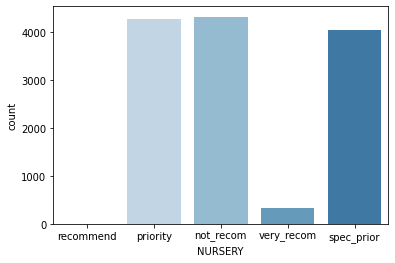

In [34]:
sns.set_palette(sns.color_palette("Blues"))
sns.countplot(data.NURSERY,saturation=0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


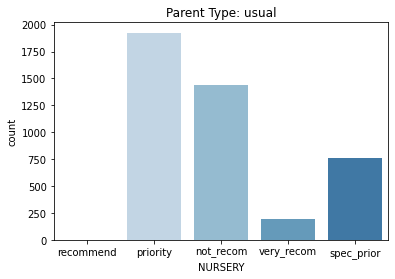

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


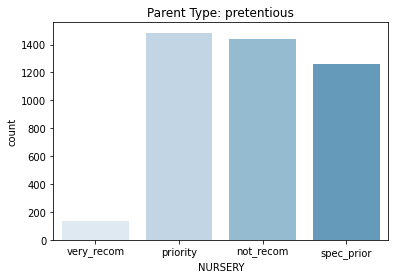

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


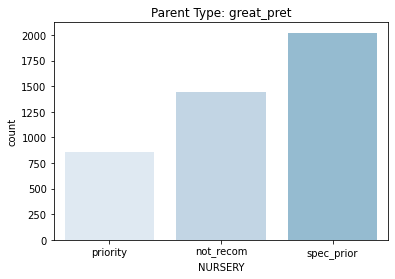

In [36]:
for i in data.parents.unique():
  temp=data[data.parents==i]
  sns.countplot(temp.NURSERY,saturation=0.7)
  plt.title('Parent Type: %s'%i)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


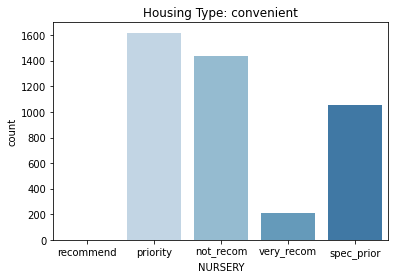

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


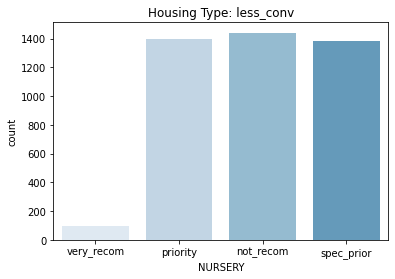

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


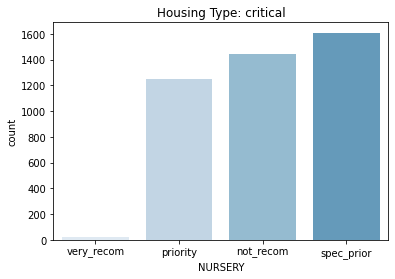

In [37]:
for i in data.housing.unique():
  temp=data[data.housing==i]
  sns.countplot(temp.NURSERY,saturation=0.7)
  plt.title('Housing Type: %s'%i)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


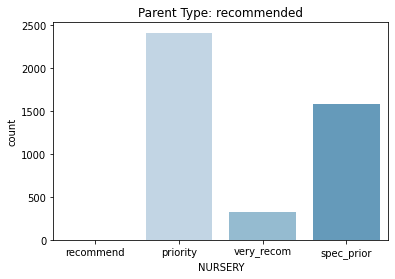

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


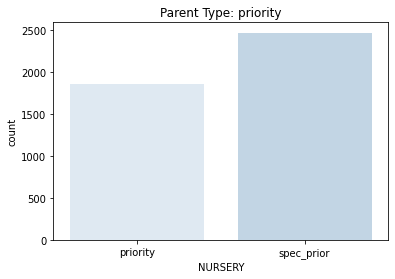

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


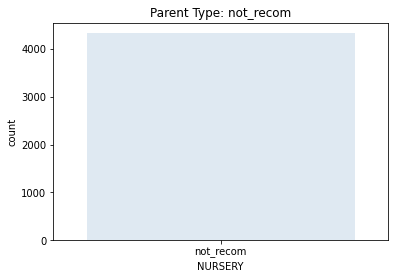

In [39]:
# dependence in health
for i in data.health.unique():
  temp=data[data.health==i]
  sns.countplot(temp.NURSERY,saturation=0.7)
  plt.title('Parent Type: %s'%i)
  plt.show()

*Step 5: Train a Logistic Model*